## DirectXRidePrice

Primeira vista e estudo do dataset proporcionado pelo projeto Cidamo no minicurso introdutório ao programa. Pessoalmente, não faço ideia do que verei a seguir muito menos de como irei lidar com os dados.

Como o assunto do estudo é redes neurais, estarei resolvendo o problema pela teoria. De qualquer maneira, pela minha facilidade com o scikit-learn irei utiliza-lo para boa parte do pré-processamento e de diversos testes que provavelmente irei fazer com o dataset.

O Objetivo é prever qual é a versão mais alta de Direct X sustentada por cada GPU.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
Dt = pd.read_csv('Train.csv')
Dt.head()
#Minha primeira vista nos dados do Dataset. Dos Datasets ofertados no curso, este é o maior
# com uma ednorme quantidade de features para estudar.

#Deixo bem claro meu susto ao perceber a quantidade de valor nulo em certas linhas

,Nome,Best_Resolution,Boost_Clock,Core_Speed,DVI_Connection,Dedicated,DisplayPort_Connection,HDMI_Connection,Integrated,L2_Cache,...,Power_Connector,Process,ROPs,Resolution_WxH,SLI_Crossfire,Shader,TMUs,Texture_Rate,VGA_Connection,DirectX
0,GDVGF0SH61PY9M2INL2QI3AHTK3HTCKI7VHE7O19,1920 x 1080,1253 MHz,1076 MHz,1.0,Yes,1.0,1.0,No,1024KB,...,None,28nm,32,5120x3200,Yes,5.0,48.0,60 GTexel/s,0.0,12
1,7JK45GGO3YLWSYL,NaN,NaN,\n-,NaN,Yes,NaN,NaN,No,0KB,...,NaN,NaN,NaN,2560x1600,No,4.0,NaN,NaN,NaN,10
2,ZC0GAMPBZGI7HE1,1366 x 768,NaN,810 MHz,NaN,Yes,NaN,NaN,No,256KB,...,NaN,28nm,16,4096x2160,No,5.0,32.0,26 GTexel/s,NaN,12
3,TOASMLBKENKUKMXGHHQ1CN95QZRZB2GF7G35KJMOC,1920 x 1080,1111 MHz,1046 MHz,1.0,Yes,NaN,2.0,No,384KB,...,None,28nm,24,4096x2160,Yes,5.0,80.0,89 GTexel/s,0.0,12
4,G1C3DNBKSFIJ1QH9,1366 x 768,NaN,954 MHz,NaN,Yes,NaN,NaN,No,128KB,...,NaN,28nm,8,4096x2160,No,5.0,32.0,31 GTexel/s,NaN,12


In [3]:
Dt.info()
#Potencializar meu medo sobre tratar estes valores nulos 
0#Pelo menos a versão do Direct X não contém nenhum nulo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3180 entries, 0 to 3179
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Nome                    3180 non-null   object 
 1   Best_Resolution         2650 non-null   object 
 2   Boost_Clock             1412 non-null   object 
 3   Core_Speed              3180 non-null   object 
 4   DVI_Connection          2501 non-null   float64
 5   Dedicated               3170 non-null   object 
 6   DisplayPort_Connection  836 non-null    float64
 7   HDMI_Connection         2492 non-null   float64
 8   Integrated              3170 non-null   object 
 9   L2_Cache                3180 non-null   object 
 10  Max_Power               2633 non-null   object 
 11  Memory                  2814 non-null   object 
 12  Memory_Bandwidth        3079 non-null   object 
 13  Memory_Bus              3133 non-null   object 
 14  Memory_Speed            3089 non-null   

0

## EDA

Irei separar o EDA em alguns capitulos do meu sofrimento

### Valores nulos

Não pretendo trata-los agora, mas acredito ser de extrema importância analisar a relação de valores nulos com o direct X

In [4]:
Dt['DirectX'].loc[Dt.isna().sum(axis = 1) >1 ].value_counts()


12    915
11    420
10    373
9     153
8      40
Name: DirectX, dtype: int64

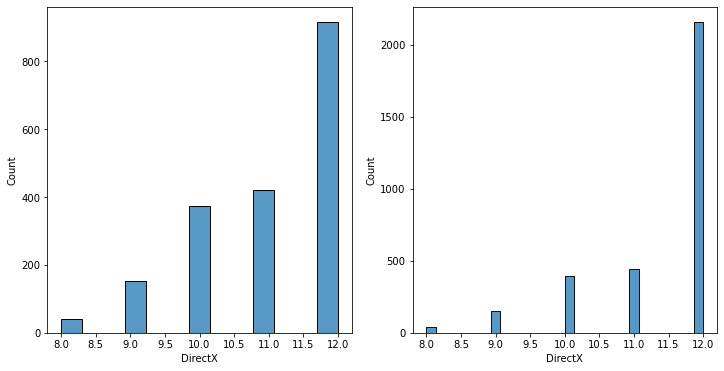

In [5]:
fig, axes,  = plt.subplots(1,2,figsize = (12,6))
sns.histplot(data = Dt['DirectX'].loc[Dt.isna().sum(axis = 1) > 1 ],
ax = axes[0],
)
sns.histplot(
data = Dt['DirectX'],
ax = axes[1]
)
plt.show()
#Em geral a disposição dos DirectX nas GPUS que apresentam valores nulos não muda muito comparado ao padrão

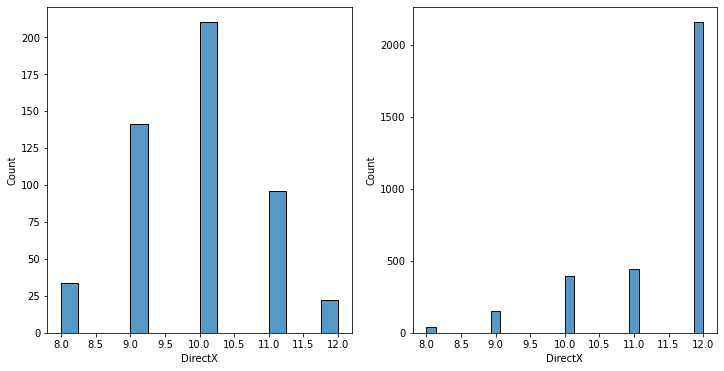

In [6]:
fig, axes,  = plt.subplots(1,2,figsize = (12,6))
sns.histplot(data = Dt['DirectX'].loc[Dt.isna().sum(axis = 1) > 7 ],
ax = axes[0],
)
sns.histplot(
data = Dt['DirectX'],
ax = axes[1]
)
plt.show()
#No caso de muitas colunas nulas ja ocorre uma mudança, porém ainda não há muito o que possa se tirar desses gráficos

In [7]:
for column in Dt.columns:
    print(Dt['DirectX'].loc[Dt[column].isna() == True ].mean())
print(Dt['DirectX'].mean(),Dt['DirectX'].loc[Dt.isna().sum(axis = 1) >1 ].mean())
#Perceba que há médias muito menores do que o esperado

nan
9.864150943396226
11.010180995475114
nan
10.910162002945508
11.5
11.238054607508532
10.896802325581396
11.5
nan
10.76965265082267
10.756830601092895
10.07920792079208
10.212765957446809
9.89010989010989
10.255813953488373
nan
10.843006660323502
9.748314606741573
11.0015479876161
9.598930481283423
9.736961451247165
9.626666666666667
nan
10.621951219512194
9.736961451247165
9.748314606741573
10.912536443148689
nan
11.420754716981133 11.061020515518148


In [8]:
importantnull = []
for column in Dt.columns:
    if Dt['DirectX'].loc[Dt[column].isna()  == True ].mean() < 10:
        importantnull.append(column)
        print('A média do directX rodado na', column, ' Com  um nulo é:', Dt['DirectX'].loc[Dt[column].isna()  == True ].mean() )
print('O conjunto de colunas onde os valores nulos influenciam o DirectX rodado é:',importantnull)        

A média do directX rodado na Best_Resolution  Com  um nulo é: 9.864150943396226
A média do directX rodado na Memory_Speed  Com  um nulo é: 9.89010989010989
A média do directX rodado na Pixel_Rate  Com  um nulo é: 9.748314606741573
A média do directX rodado na Process  Com  um nulo é: 9.598930481283423
A média do directX rodado na ROPs  Com  um nulo é: 9.736961451247165
A média do directX rodado na Resolution_WxH  Com  um nulo é: 9.626666666666667
A média do directX rodado na TMUs  Com  um nulo é: 9.736961451247165
A média do directX rodado na Texture_Rate  Com  um nulo é: 9.748314606741573
O conjunto de colunas onde os valores nulos influenciam o DirectX rodado é: ['Best_Resolution', 'Memory_Speed', 'Pixel_Rate', 'Process', 'ROPs', 'Resolution_WxH', 'TMUs', 'Texture_Rate']


O que iremos fazer com cada uma desses valores iremos decidir depois. Mas é possível criar uma coluna extra dizendo se esses dados são nulos ou não e fazer outros estudos com base nisso

### Valores númericos

Primeiramente gostaria de dar uma olhada nos valores numéricos. Observar claros casos de outliers e ter uma noção das médias dos dados e quais eu gostaria (ou não) de normalizar.

In [9]:
Dt.describe(percentiles= (0.25,0.75,0.9,0.99))

,DVI_Connection,DisplayPort_Connection,HDMI_Connection,Shader,TMUs,VGA_Connection,DirectX
count,2501.000000,836.000000,2492.000000,3098.000000,2739.000000,2494.000000,3180.000000
mean,1.368653,1.616029,0.864366,4.744061,70.230376,0.212109,11.420755
std,0.707701,1.221438,0.466525,0.644150,54.450249,0.428991,0.964130
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,8.000000
25%,1.000000,1.000000,1.000000,5.000000,32.000000,0.000000,11.000000
50%,1.000000,1.000000,1.000000,5.000000,56.000000,0.000000,12.000000
75%,2.000000,3.000000,1.000000,5.000000,112.000000,0.000000,12.000000
90%,2.000000,3.000000,1.000000,5.000000,144.000000,1.000000,12.000000
99%,3.000000,3.000000,2.000000,5.000000,240.000000,1.000000,12.000000
max,4.000000,4.000000,3.000000,5.000000,384.000000,4.000000,12.000000


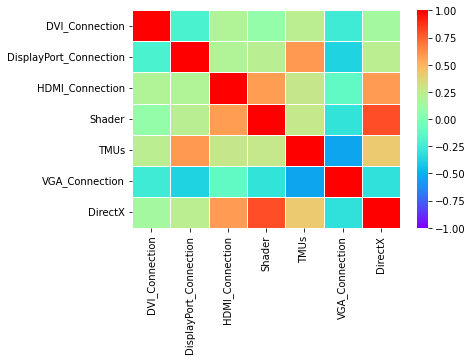

In [10]:
cmap = sns.color_palette("rainbow", as_cmap=True)
sns.heatmap(Dt.corr(method='spearman'), vmin = -1,vmax = 1,cmap = cmap,linewidths = .5)
plt.show()

In [11]:
Dt.corr(method='spearman')['DirectX'].sort_values()
#Perceba que o DisplayPort_connection não é tão relevante na ocorrencia do DirectX
#E por outro lado, ele tem uma quantidade absurda de dados faltantes
#Apartir de agora irei retirar ele do Dataset

VGA_Connection           -0.316267
DVI_Connection            0.142414
DisplayPort_Connection    0.228413
TMUs                      0.416649
HDMI_Connection           0.578608
Shader                    0.802498
DirectX                   1.000000
Name: DirectX, dtype: float64

In [12]:
Dt1 = Dt.drop('DisplayPort_Connection',axis = 1)

Reservo essa Celula para dar um pequeno resumo do que é a feature TMUs: \
In computer graphics, a texture mapping unit (TMU) is a component in modern graphics processing units (GPUs). They are able to rotate, resize, and distort a bitmap image to be placed onto an arbitrary plane of a given 3D model as a texture, in a process called texture mapping. -Wikipédia  https://en.wikipedia.org/wiki/Texture_mapping_unit

In [13]:
#Agora realizo um pequeno estudo, sobre as variaveis de portas, verificando se a ocorrencia de um DirectX maior se da
#Pela existência da porta, ou pela quantidade de portas:
print(Dt1['DirectX'].loc[Dt1['VGA_Connection'] == 0].mean(),
Dt1['DirectX'].loc[Dt1['DVI_Connection'] == 0].mean(),
Dt1['DirectX'].loc[Dt1['HDMI_Connection'] == 0].mean()
)
print(Dt1['DirectX'].loc[Dt1['VGA_Connection'] == 1].mean(),
Dt1['DirectX'].loc[Dt1['DVI_Connection'] == 1].mean(),
Dt1['DirectX'].loc[Dt1['HDMI_Connection'] == 1].mean())
print(Dt1['DirectX'].loc[Dt1['VGA_Connection'] == 2].mean(),
Dt1['DirectX'].loc[Dt1['DVI_Connection'] == 2].mean(),
Dt1['DirectX'].loc[Dt1['HDMI_Connection'] == 2].mean())
print(Dt1['DirectX'].loc[Dt1['VGA_Connection'] >= 3].mean(),
Dt1['DirectX'].loc[Dt1['DVI_Connection'] >= 3].mean(),
Dt1['DirectX'].loc[Dt1['HDMI_Connection'] >= 3].mean())
print(Dt1['DirectX'].loc[Dt1['VGA_Connection'] > 0].mean(),
Dt1['DirectX'].loc[Dt1['DVI_Connection'] > 0].mean(),
Dt1['DirectX'].loc[Dt1['HDMI_Connection'] > 0].mean())
#Tirando o caso da conexão VGA as outras features se distinguem em maioria na existência ou não das portas

11.703535353535354 11.034883720930232 10.333333333333334
11.037773359840955 11.593023255813954 11.834022750775594
9.666666666666666 11.648351648351648 11.926315789473684
10.0 11.575757575757576 12.0
11.009727626459144 11.619705751226036 11.839136831780284


Antes de realizar essas mudanças nesses dados precisamos ver algum jeito de tratar os valores nulos. Como o fato deles serem nulos não altera muito no resultado, irei somente trocar pela média 

In [14]:
Dt2 = Dt1.copy() 
Dt2['DVI_Connection'] = Dt2['DVI_Connection'].fillna(Dt2['DVI_Connection'].mode()[0])
Dt2['VGA_Connection'] = Dt2['VGA_Connection'].fillna(Dt2['VGA_Connection'].mode()[0])
Dt2['HDMI_Connection'] = Dt2['HDMI_Connection'].fillna(Dt2['HDMI_Connection'].mode()[0])


In [15]:
#Dando uma olhada no outlier claramente perceptivel na feature TMUs
Dt2['DirectX'].loc[Dt2['TMUs'] >220 ].mean() # A média diz muito que além de TMU parecer influenciar tanto no DirectX
# Diz que mexer com eles talvez não seja tão importânte, ja que se mantém na proporção dos outros


11.96875

In [16]:
Dt3 = Dt2.copy()
Dt3['DVI_Connection'] = Dt3['DVI_Connection'].apply(lambda x: 1 if x != 0 else 0)
Dt3['HDMI_Connection'] = Dt3['HDMI_Connection'].apply(lambda x: 1 if x != 0 else 0)
#Nos resta estudar TMUs e os shaders, irei trocar os valores nulos de TMUs por -1
#Assim o modelo poderá entender quando que há um valor nulo na coluna TMUs
#no caso dos shaders irei trocar pela moda também.
Dt3['TMUs'] = Dt3['TMUs'].fillna(-1)
Dt3['Shader'] = Dt3['Shader'].fillna(Dt2['Shader'].mode()[0])
Dt3.describe()

,DVI_Connection,HDMI_Connection,Shader,TMUs,VGA_Connection,DirectX
count,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000
mean,0.918868,0.857547,4.750660,60.352201,0.166352,11.420755
std,0.273081,0.349569,0.637081,56.211906,0.389788,0.964130
min,0.000000,0.000000,1.000000,-1.000000,0.000000,8.000000
25%,1.000000,1.000000,5.000000,16.000000,0.000000,11.000000
50%,1.000000,1.000000,5.000000,48.000000,0.000000,12.000000
75%,1.000000,1.000000,5.000000,96.000000,0.000000,12.000000
max,1.000000,1.000000,5.000000,384.000000,4.000000,12.000000


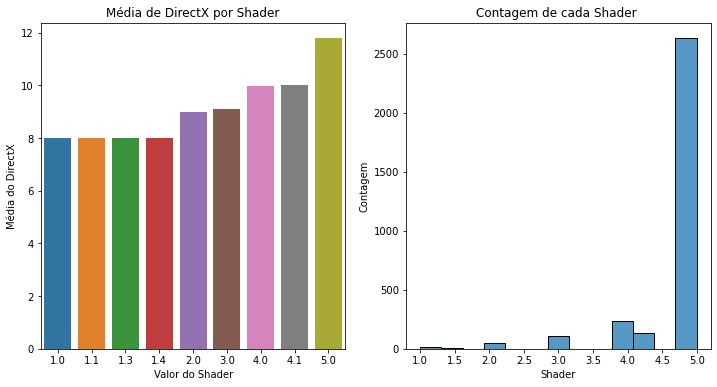

In [17]:
# Para finalizar, irei plotar graficos dos valores de shaders e TMUs para observar o quao bem ficou nossa abordagem
x = []
y = []
for i in Dt3['Shader'].unique():
    y.append(Dt3['DirectX'].loc[Dt3['Shader'] ==  i ].mean())
    x.append(i)
fig ,axes = plt.subplots(1,2, figsize = (12,6))


sns.barplot( ax = axes[0],
x = x,
y = y
)
sns.histplot(data = Dt3,
x = 'Shader',
ax = axes[1]
)
axes[0].set_title('Média de DirectX por Shader')
axes[1].set_title('Contagem de cada Shader ')
axes[0].set_xlabel('Valor do Shader')
axes[0].set_ylabel('Média do DirectX')
axes[1].set_ylabel('Contagem')
plt.show()


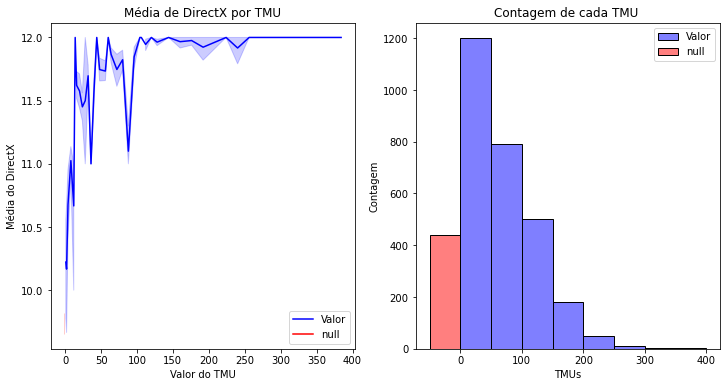

In [18]:
fig ,axes = plt.subplots(1,2, figsize = (12,6))
bins =[-50,0,50,100,150,200,250,300,400]
clrs = ['null' if (x == -1) else 'Valor' for x in Dt3['TMUs'] ]
pallete ={
    'null' : 'red',
    'Valor' : 'blue'
}
sns.lineplot(data = Dt3,
ax = axes[0],
x = 'TMUs',
y = 'DirectX',
hue = clrs,
palette= pallete,
)
sns.histplot(data = Dt3,
x = 'TMUs',
ax = axes[1],
bins = bins,
hue=clrs,
palette = pallete
)
axes[0].set_title('Média de DirectX por TMU')
axes[1].set_title('Contagem de cada TMU ')
axes[0].set_xlabel('Valor do TMU')
axes[0].set_ylabel('Média do DirectX')
axes[1].set_ylabel('Contagem')
plt.show()

### Valores Categóricos

In [19]:
#novamente, plotarei os tipos de cada feature
Dt3.info() # E agora com calma irei passar olhando por cada variavel

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3180 entries, 0 to 3179
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Nome              3180 non-null   object 
 1   Best_Resolution   2650 non-null   object 
 2   Boost_Clock       1412 non-null   object 
 3   Core_Speed        3180 non-null   object 
 4   DVI_Connection    3180 non-null   int64  
 5   Dedicated         3170 non-null   object 
 6   HDMI_Connection   3180 non-null   int64  
 7   Integrated        3170 non-null   object 
 8   L2_Cache          3180 non-null   object 
 9   Max_Power         2633 non-null   object 
 10  Memory            2814 non-null   object 
 11  Memory_Bandwidth  3079 non-null   object 
 12  Memory_Bus        3133 non-null   object 
 13  Memory_Speed      3089 non-null   object 
 14  Memory_Type       3137 non-null   object 
 15  Notebook_GPU      3180 non-null   object 
 16  PSU               2129 non-null   object 


In [20]:
#Para Agilizar o trabalho irei tentar computar os valores em grupos
VarUM = ['Boost_Clock','Core_Speed','Max_Power','Memory','Memory_Bus','Memory_Speed','Pixel_Rate','Process','Texture_Rate']
Dt3[VarUM]
# Estas são features cujos variaveis acompanham alguma unidade de medida, retira-las será razoavelmente facil

,Boost_Clock,Core_Speed,Max_Power,Memory,Memory_Bus,Memory_Speed,Pixel_Rate,Process,Texture_Rate
0,1253 MHz,1076 MHz,75 Watts,2048 MB,128 Bit,1653 MHz,40 GPixel/s,28nm,60 GTexel/s
1,NaN,\n-,50 Watts,512 MB,128 Bit,800 MHz,NaN,NaN,NaN
2,NaN,810 MHz,45 Watts,2048 MB,128 Bit,900 MHz,13 GPixel/s,28nm,26 GTexel/s
3,1111 MHz,1046 MHz,NaN,2048 MB,192 Bit,1502 MHz,27 GPixel/s,28nm,89 GTexel/s
4,NaN,954 MHz,25 Watts,1024 MB,64 Bit,900 MHz,8 GPixel/s,28nm,31 GTexel/s
...,...,...,...,...,...,...,...,...,...
3175,1000 MHz,300 MHz,5 Watts,NaN,128 Bit,933 MHz,8 GPixel/s,14nm,16 GTexel/s
3176,NaN,775 MHz,NaN,1024 MB,128 Bit,1000 MHz,6 GPixel/s,40nm,16 GTexel/s
3177,NaN,820 MHz,NaN,1024 MB,256 Bit,1100 MHz,26 GPixel/s,40nm,39 GTexel/s
3178,NaN,850 MHz,NaN,2048 MB,128 Bit,800 MHz,14 GPixel/s,28nm,27 GTexel/s


In [21]:
# Exemplo do Processo para converção à float de features do tipo objeto com uma string sem mexer nos valores nulos
Dt4 = Dt3.copy()
Dt4['Core_Speed'] = Dt4['Core_Speed'].apply(lambda x: x if x != '\n- ' else np.nan) #Trata os dados escritos de forma bizzarra
Dt4['Boost_Clock'] = Dt4['Boost_Clock'].convert_dtypes() #Converte para o melhor tipo, neste caso string
Dt4['Boost_Clock'] = Dt4['Boost_Clock'].fillna('0 mz') #Para podermos ignorar os valores nulos 
Dt4['Boost_Clock'] = Dt4['Boost_Clock'].apply(lambda x: x.split()[0]) #Separamos a parte que queremos
Dt4['Boost_Clock'] = Dt4['Boost_Clock'].apply(lambda x: np.nan if x == '0'  else float(x)) #Voltamos ao dataset com nulos e ja convertemos para float


In [22]:
print(Dt4['Boost_Clock'],Dt4['Boost_Clock'].describe())

0       1253.0
1          NaN
2          NaN
3       1111.0
4          NaN
         ...  
3175    1000.0
3176       NaN
3177       NaN
3178       NaN
3179    1582.0
Name: Boost_Clock, Length: 3180, dtype: float64 count    1412.000000
mean     1205.971671
std       253.409405
min       400.000000
25%      1050.000000
50%      1176.000000
75%      1317.000000
max      1936.000000
Name: Boost_Clock, dtype: float64
